In [1]:
from utils.Variable_setup import *
from utils.Extraction_functions import *
from utils.ICC_functions import *
import numpy as np
import os
import nibabel as nib

200720-14:42:17,876 nipype.utils INFO:
	 Running nipype version 1.5.0-rc1 (latest: 1.5.0)


In [19]:
mask = nib.load(Template_Mask).dataobj
mask = mask[:].astype(bool)

In [3]:
metrics = Metrics
paradigms = Metrics_paradigms + Extracted_Metrics_paradigms

## Makes the file locations array for a given image type

In [4]:
proc='GDT'
digm='Single_Band'
met='Fractional_Anisotropy'
sessions=['ses-1', 'ses-2', 'ses-3']

file_locations = np.full([30,3], np.nan, dtype=object)
for sid, ses in enumerate(sessions):
    fpath = os.path.join(Basic_maps_path,proc,digm,met,ses)
    for sub in range(1,num_subjects+1):
        substring = 'sub-'+str(sub).zfill(2)+'_'+ses+'*'
        file = find(substring, fpath)
        if not file:
            continue
        else:
            file_locations[sub-1,sid] = file[0]

In [5]:
#Loads all niftii images into a 5D numpy
whole_cohort = load_whole_cohort(file_locations)

subject:  1
session:  1
subject:  1
session:  2
subject:  1
session:  3
subject:  2
session:  1
subject:  2
session:  2
subject:  2
session:  3
subject:  3
session:  1
subject:  3
session:  2
subject:  3
session:  3
subject:  4
session:  1
subject:  4
session:  2
subject:  4
session:  3
subject:  5
session:  1
subject:  5
session:  2
subject:  5
session:  3
subject:  6
session:  1
subject:  6
session:  2
subject:  6
session:  3
subject:  7
session:  1
subject:  7
session:  2
subject:  7
session:  3
subject:  8
session:  1
sub:  8  ses:  1  no file
subject:  8
session:  2
sub:  8  ses:  2  no file
subject:  8
session:  3
sub:  8  ses:  3  no file
subject:  9
session:  1
subject:  9
session:  2
subject:  9
session:  3
subject:  10
session:  1
subject:  10
session:  2
subject:  10
session:  3
subject:  11
session:  1
subject:  11
session:  2
subject:  11
session:  3
subject:  12
session:  1
subject:  12
session:  2
subject:  12
session:  3
subject:  13
session:  1
subject:  13
session:  2

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

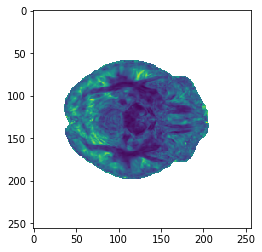

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(Curr_CVbs[:,:,60])

In [20]:
#Calculates ICC, CVws, CVbs on 5D numpy
Curr_ICC, Curr_CVws, Curr_CVbs = ICC_Voxelwise_Vector(whole_cohort,mask)

/mnt/storage/home/robert/SAGAB/utils/ICC_functions.py:162: RuntimeWarning: invalid value encountered in true_divide
  ICC = (BMS - EMS) / (BMS + (nsessions-1)*EMS)
/mnt/storage/home/robert/SAGAB/utils/ICC_functions.py:163: RuntimeWarning: invalid value encountered in true_divide
  CVws = (WMS ** 0.5) / grandmeans;
/mnt/storage/home/robert/SAGAB/utils/ICC_functions.py:164: RuntimeWarning: invalid value encountered in true_divide
  CVbs = (BMS ** 0.5) / grandmeans;


False
True


NameError: name 'Voxelwise_ICC' is not defined

In [ ]:

Voxelwise_ICC = {}
Voxelwise_CVws = {}
Voxelwise_CVbs = {}

for proc in preprocs:
    Voxelwise_ICC[proc] = {}
    Voxelwise_CVws[proc] = {}
    Voxelwise_CVbs[proc] = {}

    for digm in paradigms:
        Voxelwise_ICC[proc][digm] = {}
        Voxelwise_CVws[proc][digm] = {}
        Voxelwise_CVbs[proc][digm] = {}
        
        for met in metrics:

            #Load file locations into array
            file_locations = np.full([30,3], np.nan, dtype=object)
            
            for ses in range(1, num_sessions+1):
                fpath = os.path.join(Basic_maps_path,proc,digm,met,ses)
                for sub in range(1,num_subjects+1):
                    substring = 'sub-'+str(sub).zfill(2)+'_'+ses+'*'
                    file = find(substring, fpath)
                    if not file:
                        continue
                    else:
                        file_locations[sub,ses] = os.path.join(fpath,file)
                        
            #Loads all niftii images into a 5D numpy
            whole_cohort = load_whole_cohort(file_locations)
            
            #Calculates ICC, CVws, CVbs on 5D numpy
            Curr_ICC, Curr_CVws, Curr_CVbs = ICC_Voxelwise_Vector(whole_cohort,mask)
            
            #Store results
            Voxelwise_ICC[proc][digm][met] = Curr_ICC
            Voxelwise_CVws[proc][digm][met] = Curr_CVws
            Voxelwise_CVbs[proc][digm][met] = Curr_CVbs
            
#Loop through file structure
#Make 5D numpy array
#Compute Voxelwise ICC
#Save Voxelwise ICC map (niftii and numpy)
